In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [3]:
def plot(dataset):
    datasize = pd.read_csv('../data/' + dataset + '/targets.csv').shape[0]

    # Load the CSV file
    df = pd.read_csv('../loss_csvs/' + dataset + '.csv')

    # Get log of loss
    df['loss'] = np.log10(df['loss'] + 1e-10)
    n_methods = len(df['method'].unique())

    # Plotting
    plt.figure(figsize=(6, 0.5*n_methods))

    # Plot all loss values for each method
    for i, method in enumerate(df['method'].unique()):
        method_losses = df[df['method'] == method]['loss']
        plt.scatter(method_losses, [method] * len(method_losses), alpha=0.6, color='white', edgecolors='black')

    # Add labels and title
    plt.ylabel('Method')
    plt.xlabel('log_loss')
    plt.title(f"{dataset} (N = {datasize})")

    plt.ylim(-0.3, len(df['method'].unique()) - 0.7)  # Ensure the methods are spaced out further vertically

    # Show grid
    plt.grid(True)

    # Show plot
    plt.show()

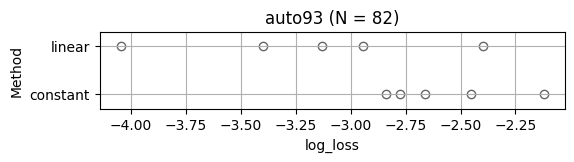

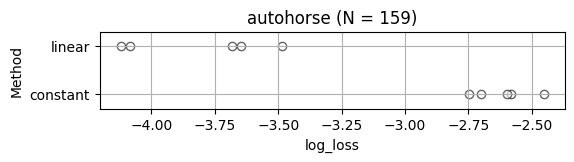

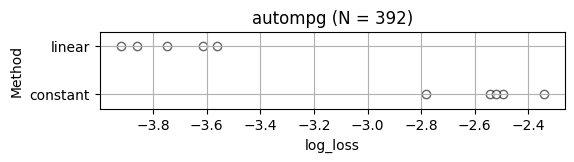

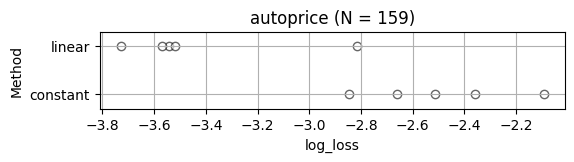

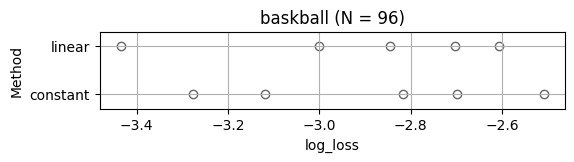

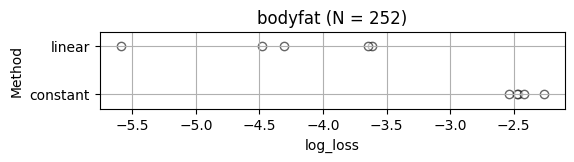

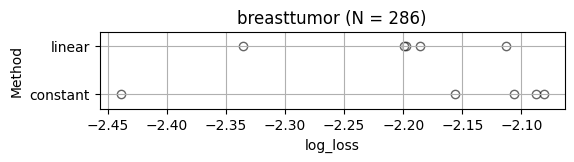

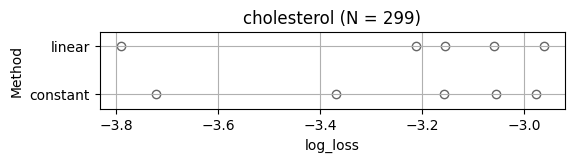

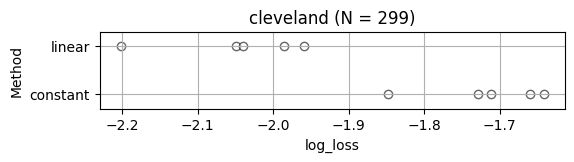

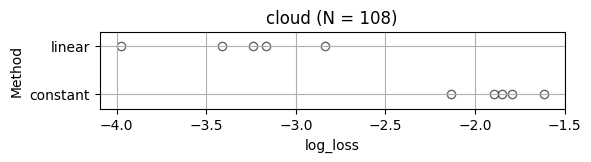

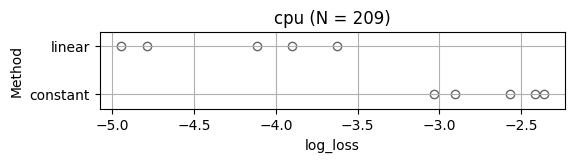

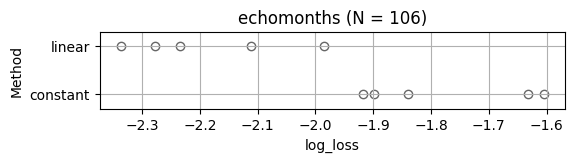

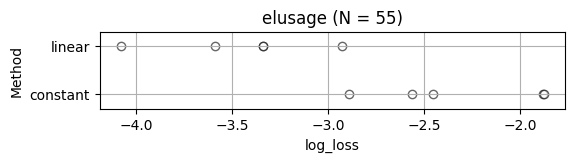

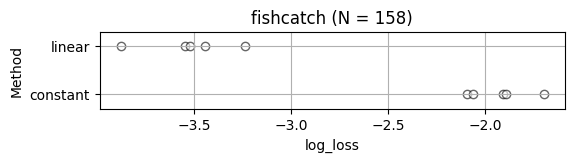

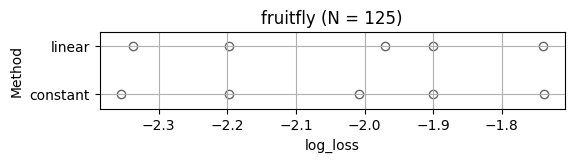

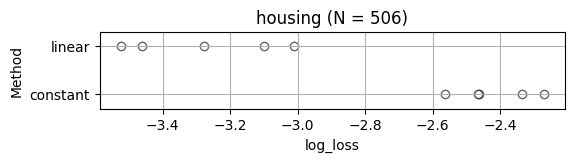

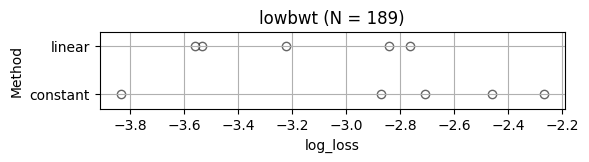

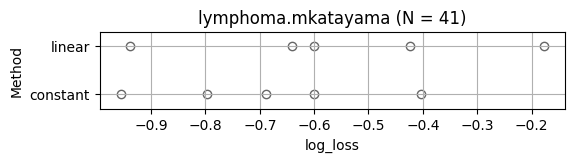

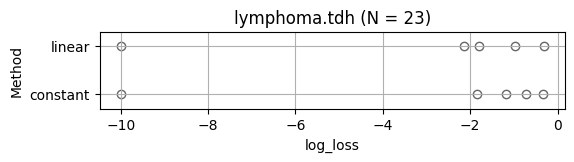

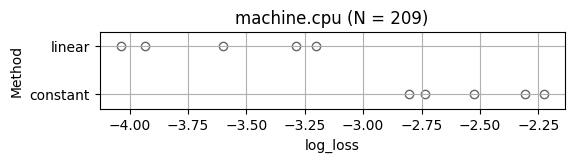

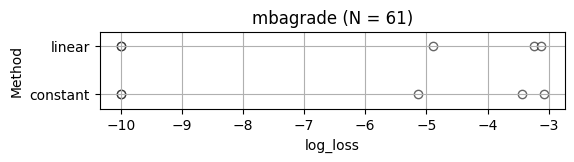

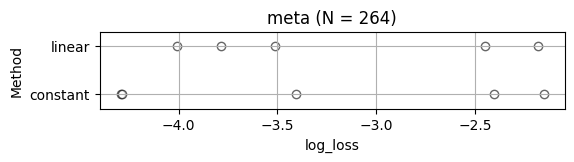

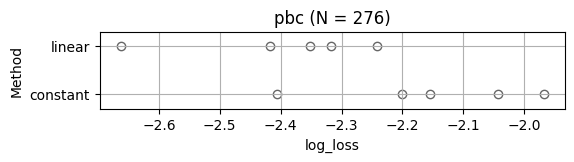

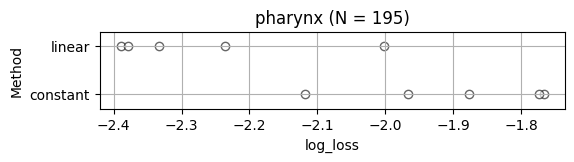

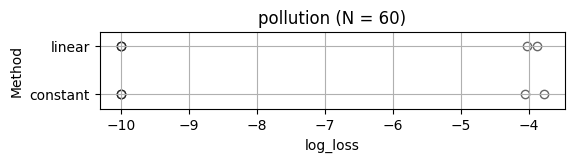

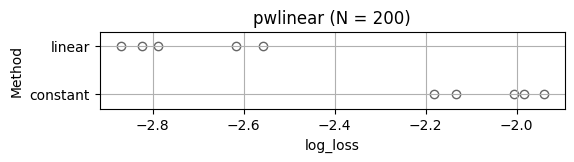

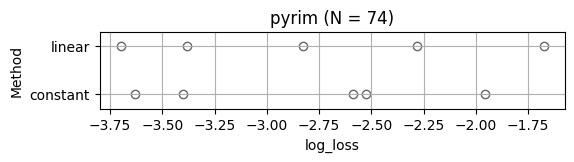

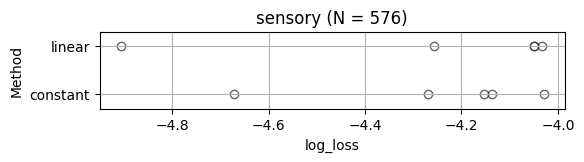

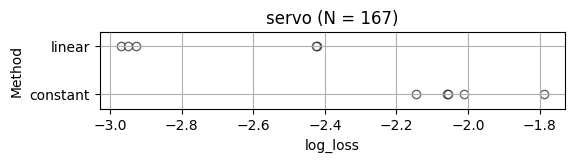

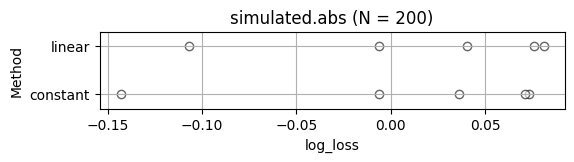

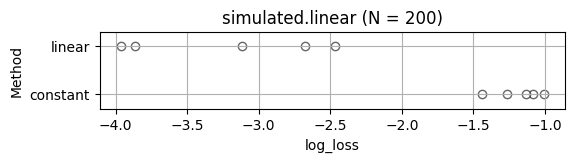

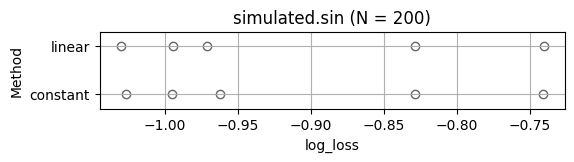

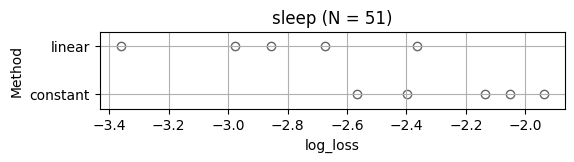

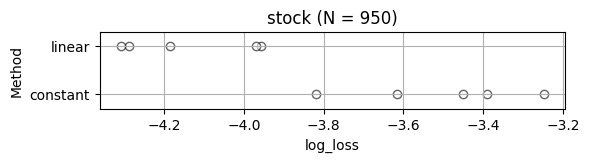

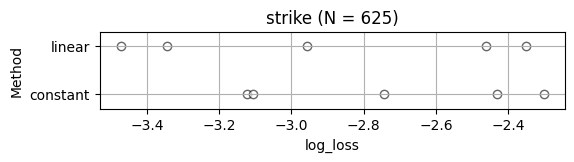

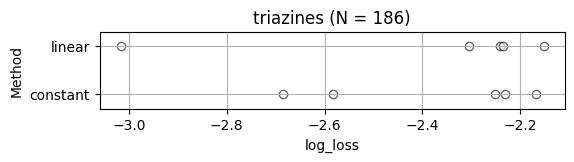

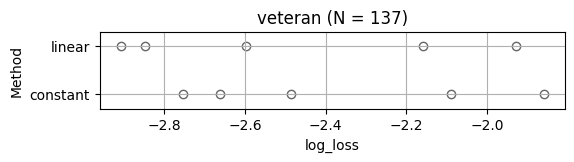

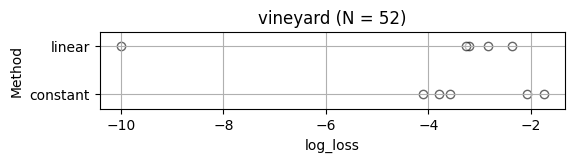

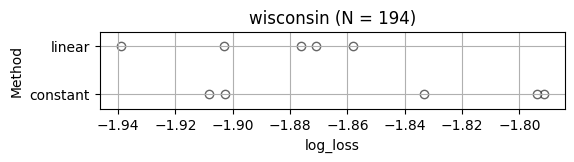

In [4]:
for dataset in datasets:
    plot(dataset)